In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings

init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
file_id = "1ymI30vvIKRS2kQFoHQqCuLRxlCP9zIDD"
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('Accidents_data_file.csv')  
data = pd.read_csv('Accidents_data_file.csv')


In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [ ]:
# data.drop(columns=['End_Lat', 'End_Lng' ,'Number', 'Airport_Code' ,'Weather_Timestamp' ,  
#                  'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
#                  'Country','ID', 'Timezone'], inplace=True)

In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# data.dropna(subset=['City','Sunrise_Sunset','Description'], inplace=True)

In [ ]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [ ]:
# data.head()

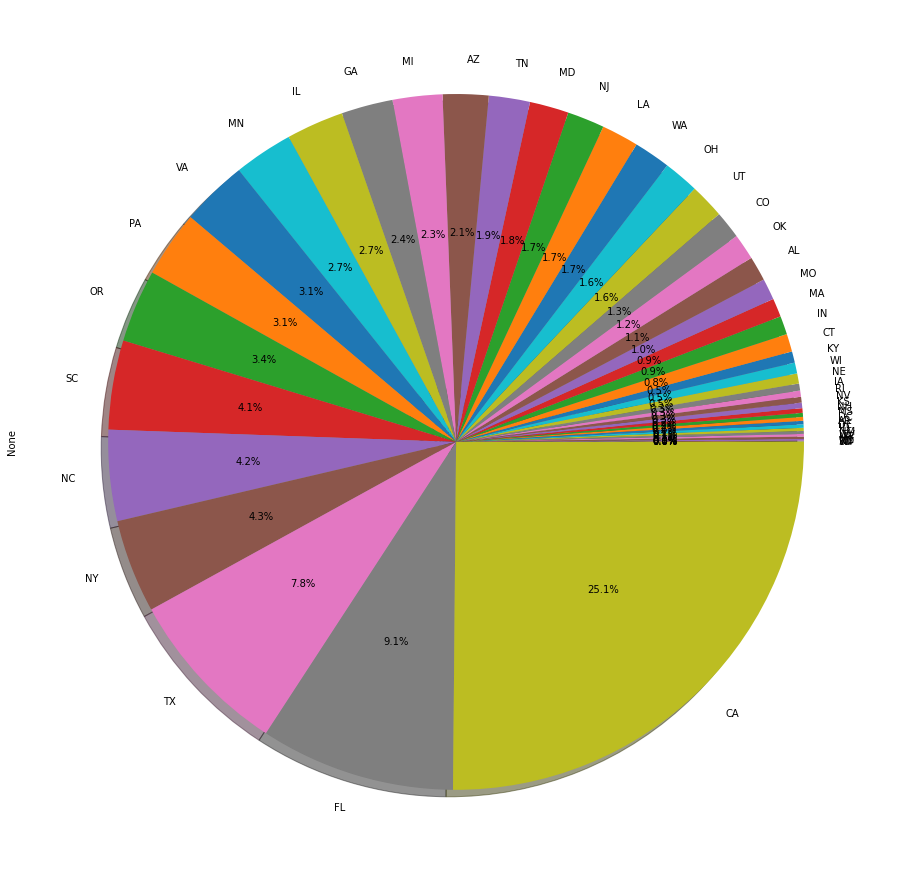

In [ ]:
data.groupby(by = 'State').size().sort_values().plot.pie(autopct = '%1.1f%%',shadow = True, figsize = (16,16))

In [ ]:
top_10_state = data[['City','State' , 'Severity']].groupby('State').agg({'City' : 'count' , 
                                                       'Severity' : 'mean' }).sort_values(
    by='City',ascending=False).head(10)

In [ ]:
df_state_city = data[['State' , 'City','Severity']].groupby(['State' , 'City']).count().rename(columns = {'Severity' : 'Count'})

top_10_city = df_state_city.sort_values(by='Count' , ascending = False).head(10)

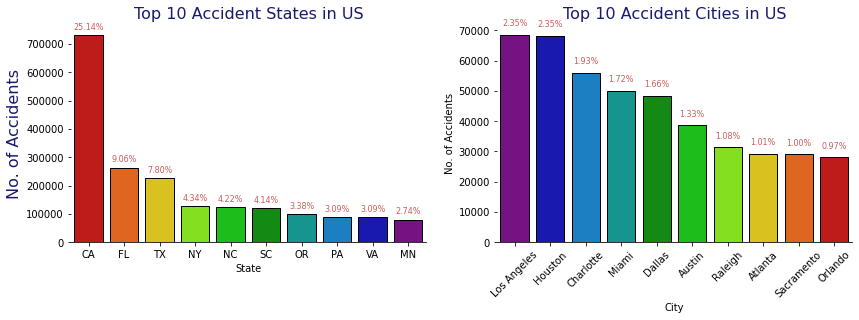

In [ ]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

bar = sns.barplot(x=top_10_state.index , y=top_10_state['City'],
                  palette='nipy_spectral_r' , 
#   
                  edgecolor = 'black',
                  ax=ax1 )
sns.despine(left = True )
ax1.set_xlabel("State")
ax1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax1.set_title('Top 10 Accident States in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

bar = sns.barplot(x=top_10_city.index.get_level_values(1) , y=top_10_city['Count'],
                  palette='nipy_spectral' ,  
                  edgecolor = 'black',
                  ax=ax2
                 )
sns.despine(left = True )
ax2.set_xlabel("City" )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Top 10 Accident Cities in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
plt.xticks(rotation = 45)


# Working to get labels
total_accidents = len(data)

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')

    
# for City
for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 3000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')
    
    
fig.show()

In [ ]:
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month 
data['Hour'] = data['Start_Time'].dt.hour
diff = data['End_Time'] - data['Start_Time']
data['DelayTime'] = round(diff.dt.seconds/3600,1)
year = data['Year'].value_counts()
month = data['Month'].value_counts().sort_index()
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug' 
             , 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}

hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}


In [ ]:
hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}

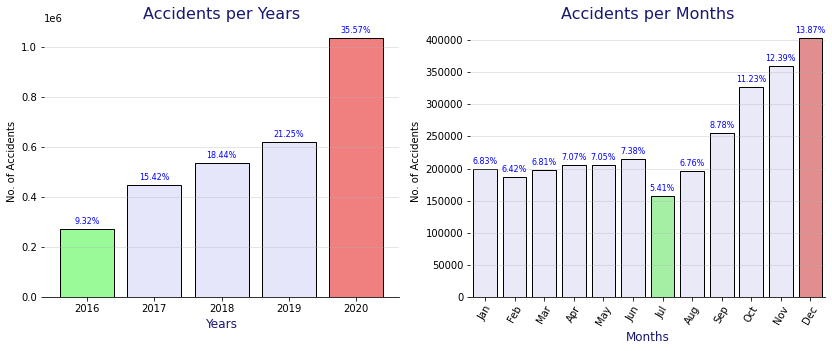

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))


# plot for year

light_palette = sns.color_palette(palette='pastel')

year_color_map = ['Lavender' for _ in range(5)]
year_color_map[0] = 'LightCoral' #light_palette[0]
year_color_map[4] = 'PaleGreen' #light_palette[2]

years = ax1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
ax1.spines[('top')].set_visible(False)
ax1.spines[('right')].set_visible(False)
ax1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax1.set_ylabel("No. of Accidents")
ax1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='Blue')

    month_color_map = ['Lavender' for _ in range(12)]
month_color_map[11] = 'LightCoral' #light_palette[0]
month_color_map[6] = 'PaleGreen' #light_palette[2]

m = sns.barplot( x= month.index.map(month_map), y=month,  ax = ax2, palette=month_color_map , edgecolor='black' )
plt.xticks(rotation=60)
ax2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
sns.despine(left=True)

for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 8000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='blue')

ax1.grid(axis='y', linestyle='-', alpha=0.4)    
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

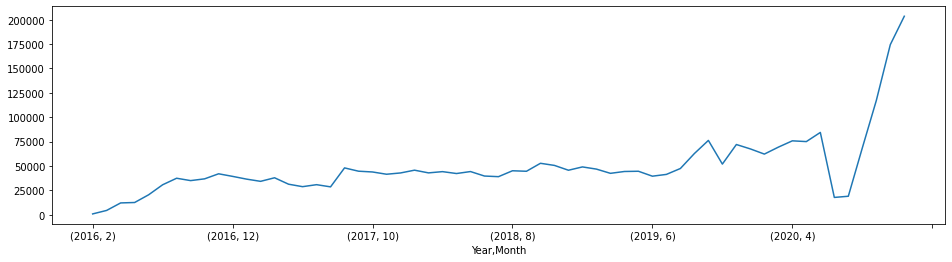

In [ ]:
fig = plt.figure(figsize = (16, 4))
data.groupby(by=['Year', 'Month']).size().plot()

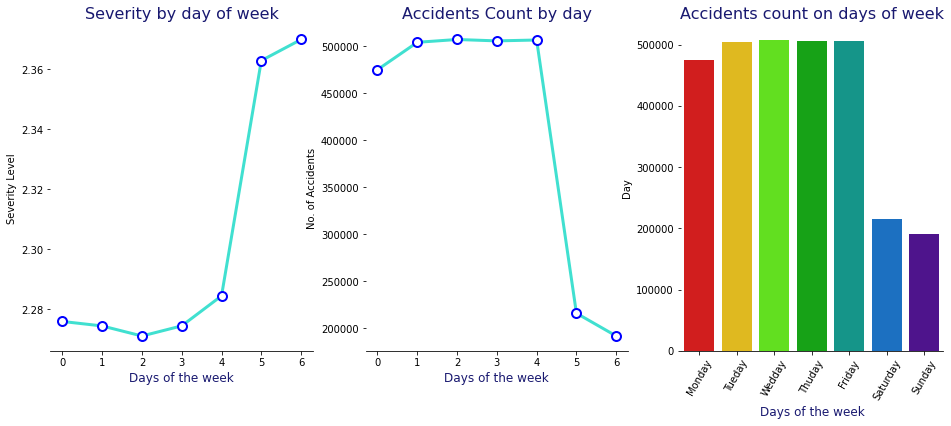

In [ ]:
fig, (ax , ax2, ax3) = plt.subplots(1,3,figsize = (16,6))

sns.set_context('paper')

ax.plot(day_severity['Severity'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')


ax.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Severity Level")
ax.set_title('Severity by day of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})


ax2.plot(day_severity['Day'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax2.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents Count by day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

f2 = sns.barplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Day'], ax = ax3, palette = 'nipy_spectral_r')
plt.xticks(rotation=60)
ax3.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax3.set_title('Accidents count on days of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

sns.despine(left=True)

fig.show()

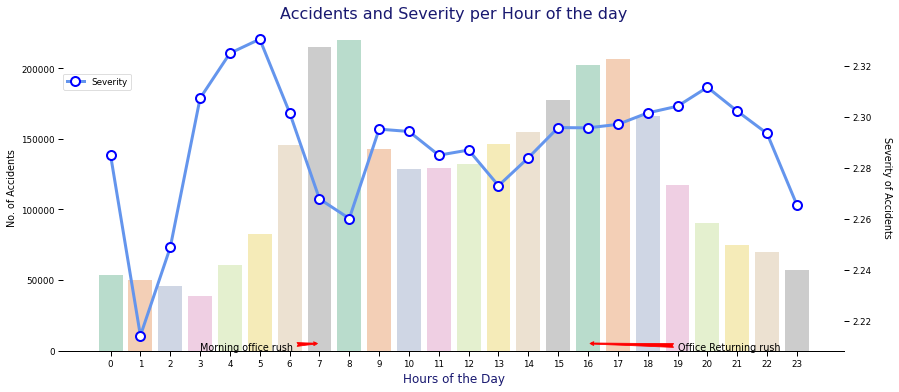

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('paper')

f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='Pastel2')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)
ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,500) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,500),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

In [ ]:
sev_4_mean = data[data['Severity'] == 4][['Severity','Year']].groupby('Year').count().mean()

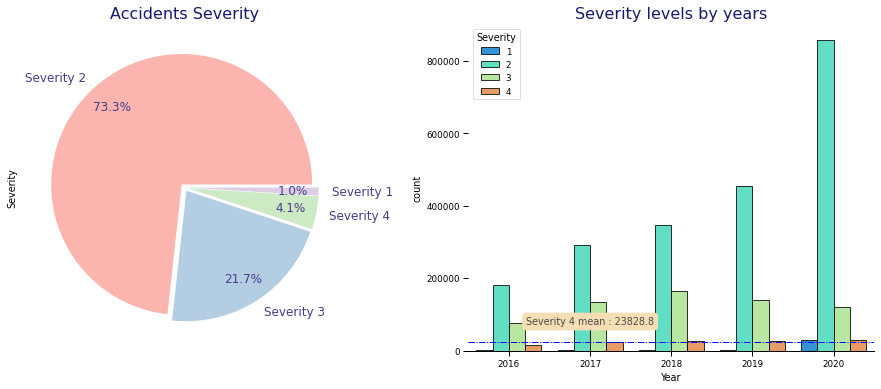

In [ ]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

data['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )


s = sns.countplot(data=data[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow' 
                  , edgecolor='black')
ax2.axhline(sev_4_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 4 mean : {sev_4_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(1,80000))

ax2.set_title("Severity levels by years", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )

sns.despine(left=True)


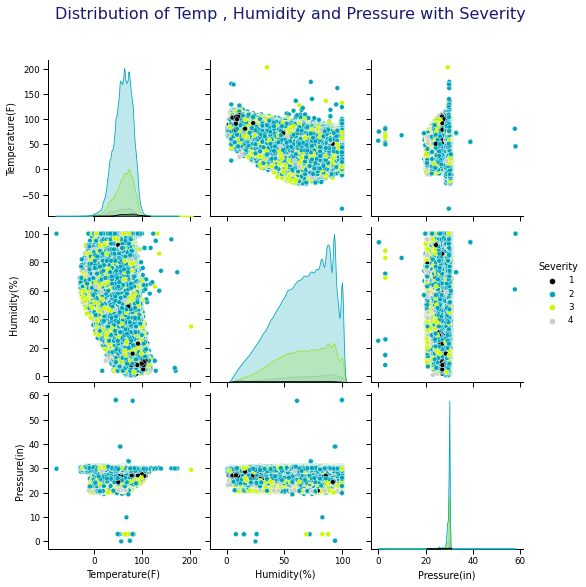

In [ ]:
pair = sns.pairplot(data[['Severity','Temperature(F)','Humidity(%)','Pressure(in)']].dropna(), hue='Severity', palette='nipy_spectral')
# pair = sns.pairplot(df[['Severity','Temperature(F)']].dropna(), hue='Severity', palette='nipy_spectral')

pair.fig.suptitle('Distribution of Temp , Humidity and Pressure with Severity', y =1.08 
                  , fontsize = 16 , color = 'MidnightBlue' , ha = 'center' , va='top')

plt.show()

In [ ]:
# top_10_weather = data['Weather'].value_counts()[:10]
# top_15_weather = data['Weather'].value_counts()[:13]

# def check_exist(x):
#     if x in top_15_weather :
#         return x
#     else :
#         return 'Other'

# data['Weather2'] = data['Weather'].apply(check_exist)


# fig, ax = plt.subplots(1,1,figsize=(16,5))

# w = sns.pointplot(y='DelayTime',x='Weather2',data=data[['Weather2','DelayTime','Severity']],
#                   hue = 'Severity'
#                   ,ci=None  , 
#                order= top_10_weather.index, 
#                height=4, aspect=2 , palette='nipy_spectral', ax= ax)

# ax.grid(axis='y', linestyle='-', alpha=0.4)  

# plt.xlabel("Weather conditions", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
# plt.xticks(fontsize=12 , rotation = 45)
# plt.ylabel("Delay Times (in Hours)")

# ax.set_title('Delay times for different Weather Conditions', fontdict = {'fontsize':16 , 'color':'MidnightBlue'}, pad=15)

# plt.show()


In [ ]:
data['Severity'] = data['Severity'].astype('int')

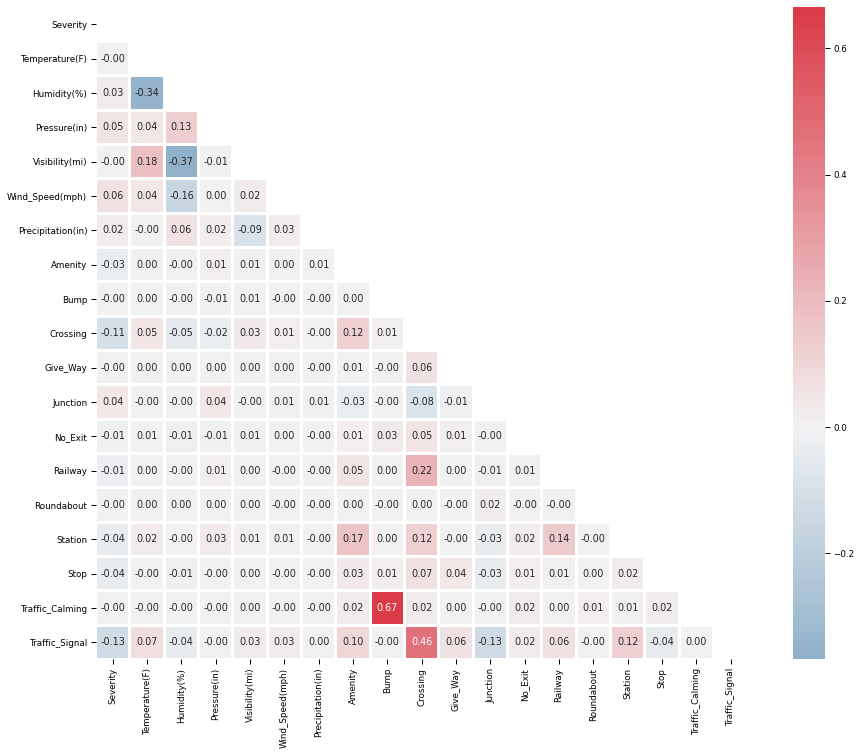

In [ ]:
features = ['Severity','Temperature(F)', 'Humidity(%)', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 
       'Sunrise_Sunset']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16,12))
sns.heatmap(data[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

(24.555269, 49.002201)

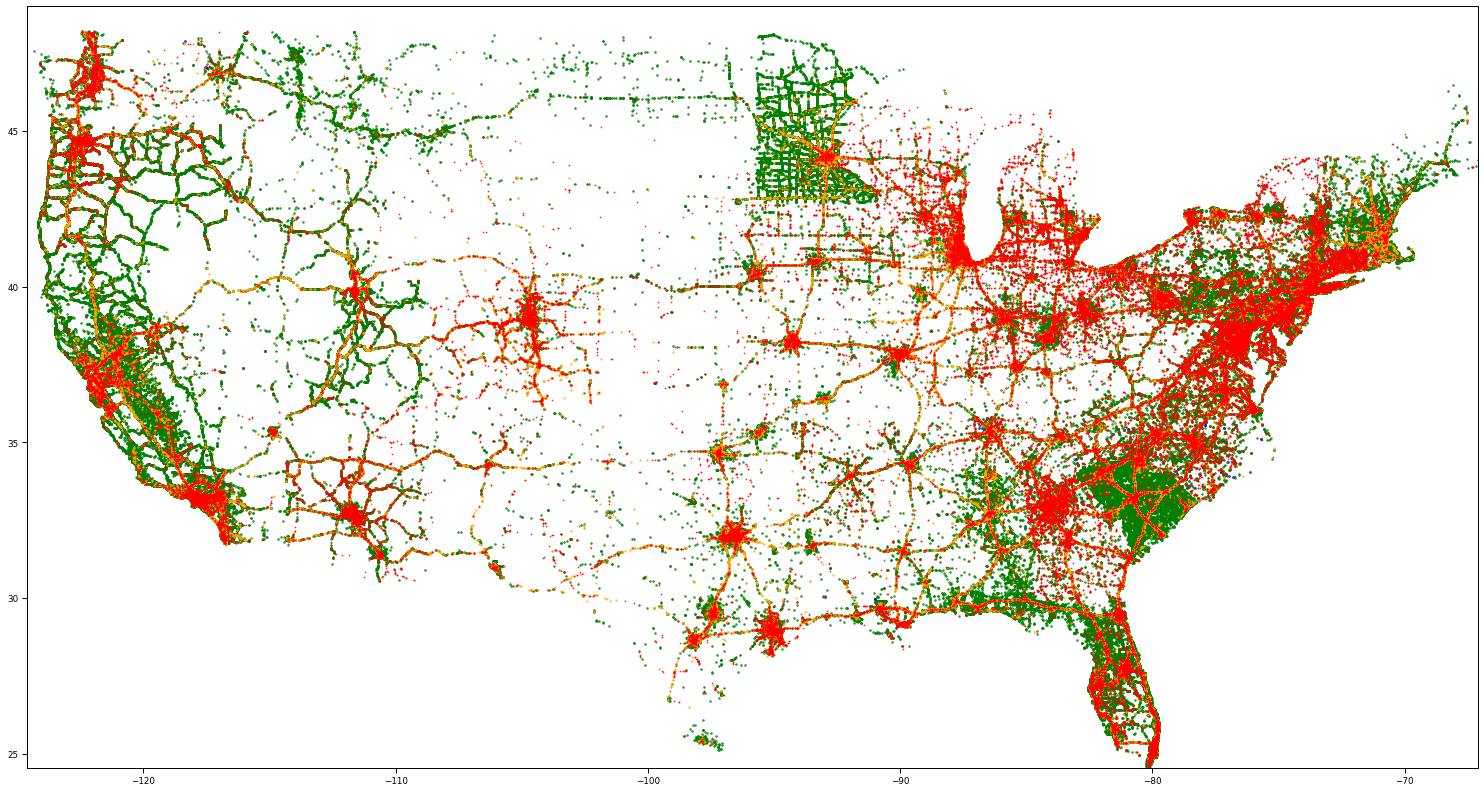

In [ ]:
BBox = ((data.Start_Lng.min(), data.Start_Lng.max(), data.Start_Lat.min(), data.Start_Lat.max()))
# map_pic = plt.imread('map1.png')


fig, ax = plt.subplots(figsize = (26,14))
ax.scatter(data[data['Severity']==1].Start_Lng+0.3, data[data['Severity']==1].Start_Lat-0.8, zorder=1, alpha= 0.7, c='blue', s=4)
ax.scatter(data[data['Severity']==2].Start_Lng+0.3, data[data['Severity']==2].Start_Lat-0.8, zorder=1, alpha= 0.7, c='green', s=3)
ax.scatter(data[data['Severity']==3].Start_Lng+0.3, data[data['Severity']==3].Start_Lat-0.8, zorder=1, alpha= 0.7, c='orange', s=2)
ax.scatter(data[data['Severity']==4].Start_Lng+0.3, data[data['Severity']==4].Start_Lat-0.8, zorder=1, alpha= 0.7, c='red', s=1)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(map_pic, zorder=0, extent = BBox, aspect= 'auto', interpolation='none')
# ax.imshow(map_pic, zorder=2, alpha= 0.5, extent = BBox, aspect= 'auto')

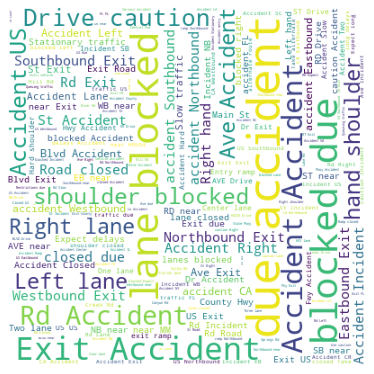

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(data['Description'].to_list())
wordcloud = WordCloud(width = 400, height = 400, background_color = 'white', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

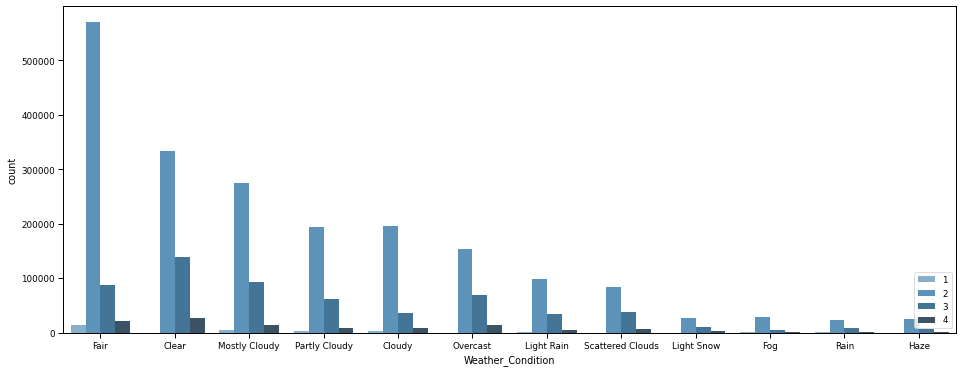

In [ ]:
fig = plt.figure(figsize = (16, 6))
sns.countplot(x="Weather_Condition", data=data, order=data['Weather_Condition'].value_counts()[:12].index, hue='Severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()

MODEL BUILDING

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [ ]:
data.isna().mean()

ID                       0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.097303
End_Lng                  0.097303
Distance(mi)             0.000000
Description              0.000000
Number                   0.650817
Street                   0.000000
Side                     0.000000
City                     0.000037
County                   0.000000
State                    0.000000
Zipcode                  0.000383
Country                  0.000000
Timezone                 0.001180
Airport_Code             0.002273
Weather_Timestamp        0.016141
Temperature(F)           0.023128
Wind_Chill(F)            0.407299
Humidity(%)              0.024520
Pressure(in)             0.019579
Visibility(mi)           0.024798
Wind_Direction           0.021838
Wind_Speed(mph)          0.105677
Precipitation(in)        0.447713
Weather_Condit

In [9]:
null_columns = ['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']

data.drop(null_columns, axis=1, inplace = True)

In [56]:
data.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                        108
County                        0
State                         0
Zipcode                    1114
Country                       0
Timezone                   3430
Airport_Code               6608
Weather_Timestamp         46917
Temperature(F)            67224
Humidity(%)               71270
Pressure(in)              56908
Visibility(mi)            72078
Wind_Direction            63474
Wind_Speed(mph)          307163
Weather_Condition         71851
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [10]:
data.dropna(axis=0, inplace = True)

In [ ]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,5,8,1.0,1
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,10,17,2.0,0
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020,12,21,0.8,6
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2018,4,16,1.0,1
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016,8,17,0.5,2


In [11]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [12]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Airport_Code': 1975,
 'Astronomical_Twilight': 2,
 'City': 11367,
 'Civil_Twilight': 2,
 'Country': 1,
 'County': 1707,
 'Description': 1331271,
 'End_Time': 2230030,
 'ID': 2571316,
 'Nautical_Twilight': 2,
 'Side': 3,
 'Start_Time': 2114391,
 'State': 49,
 'Street': 164333,
 'Sunrise_Sunset': 2,
 'Timezone': 4,
 'Weather_Condition': 124,
 'Weather_Timestamp': 478143,
 'Wind_Direction': 23,
 'Zipcode': 339727}

In [13]:
unneeded_columns = ['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country']
data.columns.to_list()
data.drop(unneeded_columns, axis=1, inplace = True)

In [14]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])
data.columns.to_list()


['Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Side',
 'County',
 'State',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [15]:
data['Start_Time_Month'] = get_months(data, 'Start_Time')
data['Start_Time_Year'] = get_years(data, 'Start_Time')

data['End_Time_Month'] = get_months(data, 'End_Time')
data['End_Time_Year'] = get_years(data, 'End_Time')

data['Weather_Timestamp_Month'] = get_months(data, 'Weather_Timestamp')
data['Weather_Timestamp_Year'] = get_years(data, 'Weather_Timestamp')


data = data.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
columns= ['Side', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']

In [18]:
for i in columns:
    le.fit(data[i])
    data[i] = le.transform(data[i])
    

In [19]:
# data['State']

In [20]:
def get_binary_column(df, column):
        return data[column].apply(lambda x: 1 if x == 'Day' else 0)

In [21]:
data['Sunrise_Sunset'] = get_binary_column(data, 'Sunrise_Sunset')
data['Civil_Twilight'] = get_binary_column(data, 'Civil_Twilight')
data['Nautical_Twilight'] = get_binary_column(data, 'Nautical_Twilight')
data['Astronomical_Twilight'] = get_binary_column(data, 'Astronomical_Twilight')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571316 entries, 0 to 2906609
Data columns (total 39 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Severity                 int64  
 1   Start_Lat                float64
 2   Start_Lng                float64
 3   Distance(mi)             float64
 4   Side                     int64  
 5   County                   int64  
 6   State                    int64  
 7   Timezone                 int64  
 8   Airport_Code             int64  
 9   Temperature(F)           float64
 10  Humidity(%)              float64
 11  Pressure(in)             float64
 12  Visibility(mi)           float64
 13  Wind_Direction           int64  
 14  Wind_Speed(mph)          float64
 15  Weather_Condition        int64  
 16  Amenity                  bool   
 17  Bump                     bool   
 18  Crossing                 bool   
 19  Give_Way                 bool   
 20  Junction                 bool   
 21  No_Exit 

In [22]:
data_y = data['Severity']
data_X = data.drop('Severity', axis=1)
#data_X = X.astype(np.float)

In [23]:
scaler = StandardScaler()

data_X = scaler.fit_transform(data_X)

In [25]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.7, random_state=100)

## DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)

# Train & Test
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Print accuracy_entropy
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

Decision Tree accuracy_score: 0.812.


## NN

In [27]:
data.shape

(2571316, 39)

In [28]:
y_train = y_train -1
y_test = y_test - 1

In [29]:
from keras.models import Sequential,Input,Model
inputs = tf.keras.Input(shape=(data_X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
        )
    

Epoch 1/20
44998/44998 [==============================] - 74s 2ms/step - loss: 0.5655 - accuracy: 0.7554 - val_loss: 0.5150 - val_accuracy: 0.7740
Epoch 2/20
44998/44998 [==============================] - 82s 2ms/step - loss: 0.5088 - accuracy: 0.7774 - val_loss: 0.5050 - val_accuracy: 0.7794
Epoch 3/20
44998/44998 [==============================] - 75s 2ms/step - loss: 0.5003 - accuracy: 0.7815 - val_loss: 0.4983 - val_accuracy: 0.7830
Epoch 4/20
44998/44998 [==============================] - 74s 2ms/step - loss: 0.4949 - accuracy: 0.7845 - val_loss: 0.4961 - val_accuracy: 0.7837
Epoch 5/20
44998/44998 [==============================] - 75s 2ms/step - loss: 0.4924 - accuracy: 0.7863 - val_loss: 0.4950 - val_accuracy: 0.7839
Epoch 6/20
44998/44998 [==============================] - 75s 2ms/step - loss: 0.4889 - accuracy: 0.7882 - val_loss: 0.4900 - val_accuracy: 0.7864
Epoch 7/20
44998/44998 [==============================] - 74s 2ms/step - loss: 0.4883 - accuracy: 0.7878 - val_loss: 0

In [30]:
model.evaluate(X_test,y_test)

24107/24107 [==============================] - 27s 1ms/step - loss: 0.4856 - accuracy: 0.7883


[0.4855826199054718, 0.7883406281471252]

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


In [ ]:
y_pred= clf.predict(X_test)
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))